# **Missing Values in Titanic DataSet**

In [3]:
import pandas as pd

df = pd.read_csv('titanic.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


**Dataset Link** : https://www.kaggle.com/c/titanic/data

#### Read the data in a pandas dataframe called titanic_df and understand their characteristics. Use "columns", "describe" and try to understand data with kaggle description


In [4]:
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [6]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413493,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000








1.  **Survived:** Outcome of survival (0 = No; 1 = Yes)
2.  **Pclass:** Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)
3.  **Name:** Name of passenger
4.  **Sex:** Sex of the passenger
5.  **Age:** Age of the passenger (Some entries contain NaN)
6.  **SibSp:** Number of siblings and spouses of the passenger aboard
7.  **Parch:** Number of parents and children of the passenger aboard
8.  **Ticket:** Ticket number of the passenger
9.  **Fare:** Fare paid by the passenger
10. **Cabin** Cabin number of the passenger (Some entries contain NaN)
11. **Embarked:** Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)









df.describe() method gives statistical information about numerical columns of the dataset

### Use 2 different methods to understand the number of non-null counts per column
df.info tells us about column datatypes, non-null counts and memory consumption. Use another one.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [15]:
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

## Three columns have missing values : age, cabin and embarked.
Calculate the percentage of null values for numeric columns

## cabin column

In [22]:
### Calculate the percentage of null values for cabin column


In [23]:
df.cabin.isnull().sum()/len(df.cabin)

0.774637127578304

### Over 77% values in this column are missing. Which do you think is the best approach for this column?

In [32]:
### Not to delete them, fill the empty values with the mode value because it is a category

cabin_mode = df.cabin.mode()[0]

map_dict = {'cabin': cabin_mode}

df.fillna(value=map_dict, inplace=True)


# embarked column

In [ ]:
### Embarked is a categorical column. Find wich values takes this variable

In [34]:
df.embarked.unique()

array(['S', 'C', nan, 'Q'], dtype=object)

In [ ]:
### Count the numbers for each value and calculate the percentage for the higher value

In [48]:
df.groupby('embarked', dropna=False).count()['name'].sort_values(ascending=False) # name has no empty values

embarked
S      914
C      270
Q      123
NaN      2
Name: name, dtype: int64

In [47]:
higdf.groupby('embarked', dropna=False).count()['name'].sort_values(ascending=False).index[0]

'S'

In [56]:
sum(df.embarked == 'S')/len(df.embarked)

0.6982429335370511

In [ ]:
### Which do you think is the best approach in this case?

In [ ]:
# Delete the rows because there are only two empty rows

# age column

In [ ]:
### Calculate the percentage of null values for age column

In [60]:
df.age.isnull().sum()/len(df.age)

0.20091673032849502

In [ ]:
### Plot an histogram with the distribution of the age column

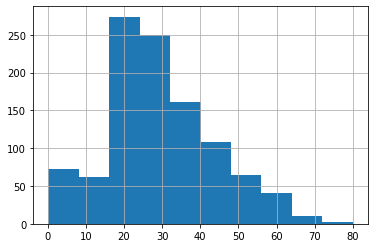

In [62]:
df.age.hist()

### Build a dataframe with Age and Sex columns

In [71]:
new_df = pd.DataFrame()

new_df['age'] = df['age']
new_df['sex'] = df['sex']
new_df.head()


,age,sex
0,29.00,female
1,0.92,male
2,2.00,female
3,30.00,male
4,25.00,female


### Use a lambda function to  atribute the mean of the age per sex to the values to the null values

In [74]:

new_df.groupby(["sex"]).transform(lambda x: x.fillna(x.mean()))

,age
0,29.000000
1,0.920000
2,2.000000
3,30.000000
4,25.000000
...,...
1304,14.500000
1305,28.687088
1306,26.500000
1307,27.000000


### Plot an histogram with the distribution of the column with the new values. Do you think is a good approach?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000011F7DC73F08>]],
      dtype=object)

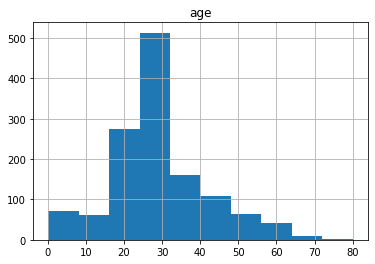

In [75]:
# it is a good approach because we are not deleting many values and we fill the empty values with the mean value

new_df.groupby(["sex"]).transform(lambda x: x.fillna(x.mean())).hist()

### Use a lambda function to  atribute the median of the age per sex to the values to the null values

In [76]:
new_df.groupby(["sex"]).transform(lambda x: x.fillna(x.median()))

,age
0,29.00
1,0.92
2,2.00
3,30.00
4,25.00
...,...
1304,14.50
1305,27.00
1306,26.50
1307,27.00


### Plot an histogram with the distribution of the column with the new values. Do you think is a good approach?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000011F7E854AC8>]],
      dtype=object)

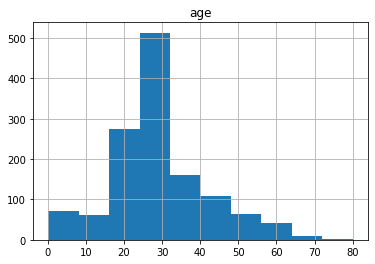

In [77]:
# it is a good approach because we are not deleting many values and the median is a strong value against outliers

new_df.groupby(["sex"]).transform(lambda x: x.fillna(x.median())).hist()